Quantum Circuit with Noise:
        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 
Noisy Circuit Result: {'0': 510, '1': 490}


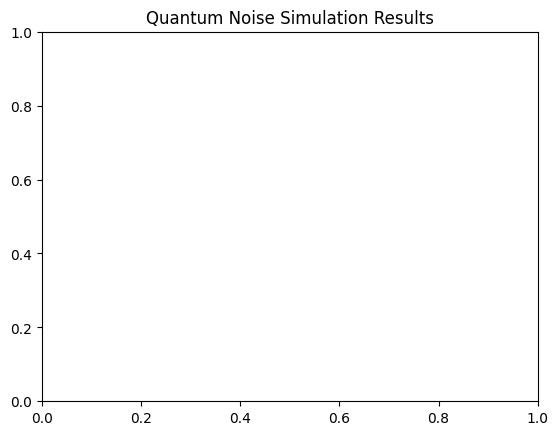

In [1]:
#-------------------------------------------------------------------------
# Quantum Noise Simulation 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt

import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
#-------------------------------------------------------------------------

# Define a quantum circuit with noise
qc = QuantumCircuit(1)
qc.h(0)  # Apply Hadamard gate
qc.measure_all()

# Add noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.1, 1), ['h'])

# Simulate with noise
simulator = Aer.get_backend('aer_simulator')
result    = execute(qc, simulator, noise_model=noise_model, shots=1000).result()
counts    = result.get_counts()

# Display the quantum circuit
print("Quantum Circuit with Noise:")
print(qc)
qc.draw('mpl')

# Print and visualize measurement results
print("Noisy Circuit Result:", counts)
plot_histogram(counts)
plt.title("Quantum Noise Simulation Results")
plt.show()
